# Import Dataset

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = "notebook_connected"

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
data = pd.read_csv("Banking_Churn.csv")

# Display 5 rows first and last of the Dataset

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.shape

(10000, 14)

In [6]:
print("Number of Rows is:", data.shape[0])
print("Number of Columns is:", data.shape[1])

Number of Rows is: 10000
Number of Columns is: 14


# Get information of the Dataset

In [7]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Check null values in columns

In [9]:
data.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

# Overall about description statistics of the dataset

In [10]:
data.describe(include = 'all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


# Describe the correlation of features

In [11]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


# Remove irrelevant features

In [12]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data visualization

In [14]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


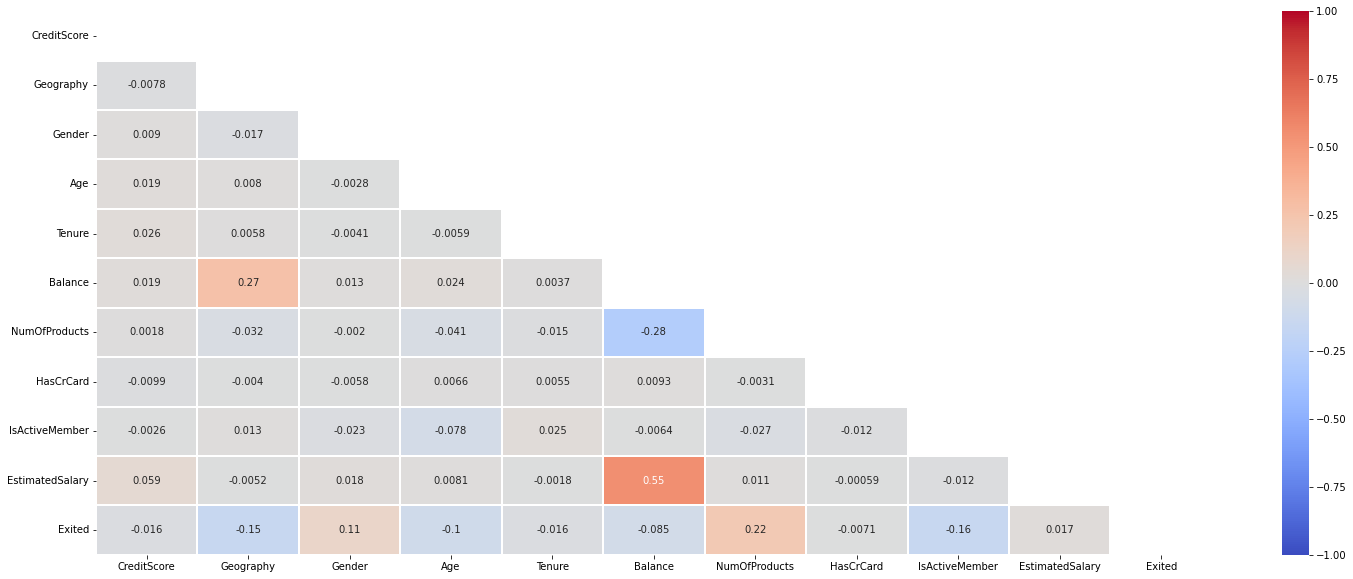

In [15]:
plt.figure(figsize=(25, 10))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
#sns.set(font_scale = 1)

In [16]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [17]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [18]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [19]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [20]:
gender_labels = ['Male','Female']
exited_labels = ['NotExited','Exited']
active_labels = ['IsActiveMember','NotIsActiveMember']
card_labels = ['HasCrCard','NotHasCrCard']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=gender_labels, values=data['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=exited_labels, values=data['Exited'].value_counts(), name="Exited"),
              1, 2)
fig.add_trace(go.Pie(labels=active_labels, values=data['IsActiveMember'].value_counts(), name="IsActiveMember"),
              2, 1)
fig.add_trace(go.Pie(labels=card_labels, values=data['HasCrCard'].value_counts(), name="HasCrCard"),
              2, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=0.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(height = 800, width = 800,
    title_text="<b>Distributions of the",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.81, font_size=20, showarrow=False),
                 dict(text='Exited', x=0.83, y=0.81, font_size=20, showarrow=False),
                 dict(text='IsActive', x=0.16, y=0.19, font_size=20, showarrow=False),
                 dict(text='HasCard', x=0.85, y=0.19, font_size=20, showarrow=False)])
fig.show()

In [21]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [22]:
data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [23]:
geography_labels = data['Geography'].value_counts().index
product_labels = data['NumOfProducts'].value_counts().index


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles = ["Geography","Products"])
fig.add_trace(go.Pie(labels=geography_labels, values=data['Geography'].value_counts(), name="Geography"),
              1, 1)
fig.add_trace(go.Pie(labels=product_labels, values=data['NumOfProducts'].value_counts(), name="NumOfProducts"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hoverinfo="label+percent+name", textfont_size=16, textposition = 'inside')

fig.update_layout(height = 400, width = 800,
    title_text="<b>Distributions of the",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Geography', font_size=16, showarrow=False),
                 dict(text='Products', font_size=16, showarrow=False)])
fig.show()

In [24]:
data['Tenure'].value_counts().sort_index()

0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: Tenure, dtype: int64

In [25]:
tenure_labels = data['Tenure'].value_counts().sort_index().index
fig = go.Figure(go.Pie(pull = [0,0,0,0,0,0,0,0,0,0, 0.3], labels=tenure_labels, values=data['Tenure'].value_counts(), name="Tenure"))
fig.update_layout(title = "<b>Distributions of the Tenure")
fig.show()

In [26]:
color_map = {1: "#86f2b8", 0: "#f4a5b8"}
fig = px.histogram(data, x = 'Exited', color = 'Gender', barmode = 'group', color_discrete_sequence = color_map, text_auto = True)
fig.update_traces(textfont_size = 12)
fig.update_layout(height = 400, width = 800, title = '<b>Distributions Of Gender By Exited')
fig.show()

In [27]:
fig = px.histogram(data, x = 'Exited', color = 'IsActiveMember', barmode = 'group', color_discrete_sequence = px.colors.qualitative.Set2, text_auto = True)
fig.update_traces(textfont_size = 12)
fig.update_layout(height = 400, width = 800, title = '<b>Distributions Of IsActiveMember By Exited')
fig.show()

In [28]:
color_map = {1: "#7cfa62", 0: "#7cfad2"}
fig = px.histogram(data, x = 'Exited', color = 'HasCrCard', barmode = 'group', color_discrete_sequence = color_map, text_auto = True)
fig.update_traces(textfont_size = 12)
fig.update_layout(height = 400, width = 800, title = '<b>Distributions Of HasCrCard By Exited')
fig.show()

In [29]:
fig = px.histogram(data, x = 'Exited', color = 'Geography', barmode = 'group', color_discrete_sequence = px.colors.qualitative.Dark24, text_auto = True)
fig.update_traces(textfont_size = 12, textposition = 'inside')
fig.update_layout(height = 400, width = 800, title = '<b>Distributions Of Geography By Exited')
fig.show()

In [30]:
fig = px.histogram(data, x = 'Exited', color = 'NumOfProducts', barmode = 'group', color_discrete_sequence = px.colors.qualitative.Pastel, text_auto = True)
fig.update_traces(textfont_size = 12, textposition = 'auto')
fig.update_layout(height = 400, width = 800, title = '<b>Distributions Of NumOfProducts By Exited')
fig.show()

In [31]:
fig = px.box(data, x='Exited', y = 'Tenure', color = 'Exited', color_discrete_sequence = px.colors.qualitative.Dark2, notched = True)
fig.update_yaxes(title_text='Tenure (Year)', row=1, col=1)
fig.update_xaxes(title_text='Exited', row=1, col=1)
fig.update_layout(autosize=True, width=500, height=400,
    title_font=dict(size=25),
    title='<b>Distributions Of NumOfProducts By Exited',
)
fig.show()

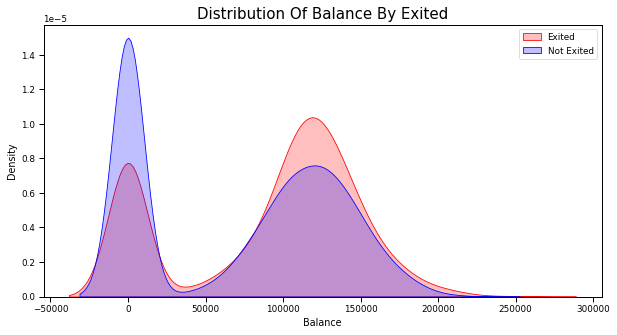

In [32]:
plt.figure(figsize = (10,5))
sns.set_context("paper",font_scale=1)
ax = sns.kdeplot(data.Balance[(data["Exited"] == 1)],
                color="Red", shade = True);
ax = sns.kdeplot(data.Balance[(data["Exited"] == 0)],
                ax = ax, color="Blue", shade= True);
ax.legend(["Exited","Not Exited"], loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Balance');
ax.set_title('Distribution Of Balance By Exited', fontdict = dict(size = 15));

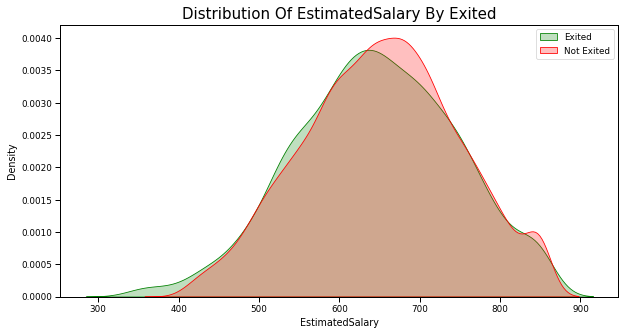

In [33]:
plt.figure(figsize = (10,5))
sns.set_context("paper",font_scale=1)
ax = sns.kdeplot(data.CreditScore[(data["Exited"] == 1)],
                color="Green", shade = True);
ax = sns.kdeplot(data.CreditScore[(data["Exited"] == 0)],
                ax = ax, color="Red", shade= True);
ax.legend(["Exited","Not Exited"], loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('EstimatedSalary');
ax.set_title('Distribution Of EstimatedSalary By Exited', fontdict = dict(size = 15));

In [34]:
fig = px.box(data, x='Exited', y = 'EstimatedSalary', color = 'Exited', notched = True)
fig.update_yaxes(title_text='Salary', row=1, col=1)
fig.update_xaxes(title_text='Exited', row=1, col=1)
fig.update_layout(autosize=True, width=500, height=400,
    title_font=dict(size=25),
    title='<b>Distributions Of Salary By Exited',
)
fig.show()

# Encoding dataset

In [35]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [36]:
data = pd.get_dummies(data, drop_first = True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Not handling inbalances

In [37]:
count = data['Exited'].value_counts()
count

0    7963
1    2037
Name: Exited, dtype: int64

In [38]:
plt.figure(figsize = (14,6))
color_map = {0 : "#00f876", 1 : "#00f8fc"}
fig = px.bar(x = count.index, y = count.values, labels = {'x':'Exited', 'y':'Count'}, color = ['0','1'], color_discrete_sequence = color_map, text_auto = True)
fig.update_traces(textfont_size = 20, textposition = 'auto')
fig.update_layout(xaxis_showticklabels = False, )
fig.show()

<Figure size 1008x432 with 0 Axes>

# Handling imbalanced dataset

In [39]:
X = data.drop('Exited', axis = 1)
y = data['Exited']
X_res, y_res = SMOTE().fit_resample(X, y)

In [40]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

# Create training set and test set

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

# Features scaling

In [42]:
std_scaler = StandardScaler()

In [43]:
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

# Logistic Regression

In [44]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_predict1 = log_reg.predict(X_test)

In [46]:
accuracy_score(y_test, y_predict1)

0.785624607658506

In [47]:
accuracy_score(y_test, y_predict1)

0.785624607658506

In [48]:
precision_score(y_test, y_predict1)

0.7728983688833124

In [49]:
recall_score(y_test, y_predict1)

0.7933032839665164

In [50]:
f1_score(y_test, y_predict1)

0.7829679059421671

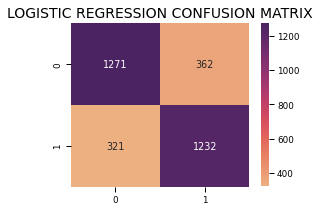

In [51]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_predict1),
                annot=True,fmt = "d",linecolor="k", cmap = sns.color_palette("flare", as_cmap=True))
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

# Support Vector Machine

In [52]:
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC()

In [53]:
y_predict2 = svm.predict(X_test)

In [54]:
accuracy_score(y_test, y_predict2)

0.8370998116760828

In [55]:
precision_score(y_test, y_predict2)

0.8268015170670038

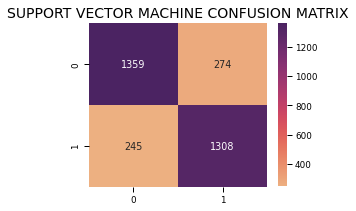

In [56]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_predict2),
                annot=True,fmt = "d",linecolor="k", cmap = sns.color_palette("flare", as_cmap=True))
    
plt.title("SUPPORT VECTOR MACHINE CONFUSION MATRIX",fontsize=14)
plt.show()

# KNeighbors Classifier

In [57]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
y_predict3 = knn.predict(X_test)

In [59]:
accuracy_score(y_test, y_predict3)

0.8157564344005022

In [60]:
precision_score(y_test, y_predict3)

0.8011221945137157

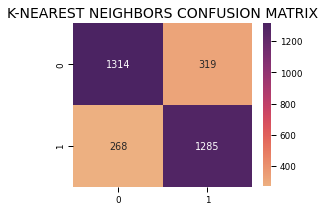

In [61]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_predict3),
                annot=True,fmt = "d",linecolor="k", cmap = sns.color_palette("flare", as_cmap=True))
    
plt.title("K-NEAREST NEIGHBORS CONFUSION MATRIX",fontsize=14)
plt.show()

# Decision Tree Classifier

In [62]:
dc_tree = DecisionTreeClassifier()
dc_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
y_predict4 = dc_tree.predict(X_test)

In [64]:
accuracy_score(y_test, y_predict4)

0.7972379158819837

In [65]:
precision_score(y_test, y_predict4)

0.7780502759043532

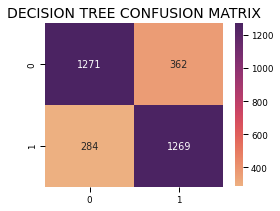

In [66]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_predict4),
                annot=True,fmt = "d",linecolor="k", cmap = sns.color_palette("flare", as_cmap=True))
    
plt.title("DECISION TREE CONFUSION MATRIX",fontsize=14)
plt.show()

# Random Forest Classifier

In [67]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
y_predict5 = rf.predict(X_test)

In [69]:
accuracy_score(y_test, y_predict5)

0.8628374136848713

In [70]:
precision_score(y_test, y_predict5)

0.8500627352572145

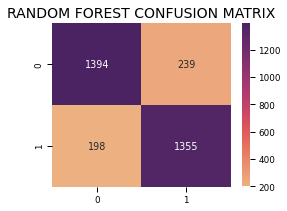

In [71]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_predict5),
                annot=True,fmt = "d",linecolor="k", cmap = sns.color_palette("flare", as_cmap=True))
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

# Gradient Boosting Classifier

In [72]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [73]:
y_predict6 = gbc.predict(X_test)

In [74]:
accuracy_score(y_test, y_predict6)

0.8468298807281858

In [75]:
precision_score(y_test, y_predict6)

0.8380952380952381

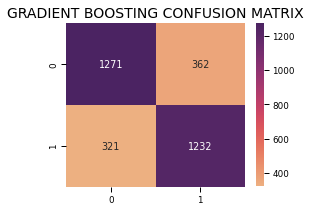

In [76]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_predict1),
                annot=True,fmt = "d",linecolor="k", cmap = sns.color_palette("flare", as_cmap=True))
    
plt.title("GRADIENT BOOSTING CONFUSION MATRIX",fontsize=14)
plt.show()

# Description Of Model Evaluation Values

In [77]:
final_data = pd.DataFrame({'Models':['LogisticRegression','Support Vector Machine','K-Nearest Neighbors','Decision Tree','Random Forest','Gradient Boosting Classifier'],
                           'Accuracy_score':[accuracy_score(y_test, y_predict1),
                                  accuracy_score(y_test, y_predict2),
                                  accuracy_score(y_test, y_predict3),
                                  accuracy_score(y_test, y_predict4),
                                  accuracy_score(y_test, y_predict5),
                                  accuracy_score(y_test, y_predict6)]})
final_data

,Models,Accuracy_score
0,LogisticRegression,0.785625
1,Support Vector Machine,0.837100
2,K-Nearest Neighbors,0.815756
3,Decision Tree,0.797238
4,Random Forest,0.862837
5,Gradient Boosting Classifier,0.846830


In [78]:
px.bar(final_data, x = 'Models', y = 'Accuracy_score', color = 'Models')

In [79]:
final_data = pd.DataFrame({'Models':['LogisticRegression','Support Vector Machine','K-Nearest Neighbors','Decision Tree','Random Forest','Gradient Boosting Classifier'],
                           'Precision_score':[precision_score(y_test, y_predict1),
                                  precision_score(y_test, y_predict2),
                                  precision_score(y_test, y_predict3),
                                  precision_score(y_test, y_predict4),
                                  precision_score(y_test, y_predict5),
                                  precision_score(y_test, y_predict6)]})
final_data

,Models,Precision_score
0,LogisticRegression,0.772898
1,Support Vector Machine,0.826802
2,K-Nearest Neighbors,0.801122
3,Decision Tree,0.778050
4,Random Forest,0.850063
5,Gradient Boosting Classifier,0.838095


In [80]:
px.bar(final_data, x = 'Models', y = 'Precision_score', color = 'Models')

# Select Model

In [81]:
X_res = std_scaler.fit_transform(X_res)
rf.fit(X_res, y_res)

RandomForestClassifier()

In [82]:
joblib.dump(rf, 'churn_predict_model')

['churn_predict_model']

In [83]:
model = joblib.load('churn_predict_model')

In [84]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [85]:
model.predict([[619,42,2,0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)

# Gui

In [86]:
def show_entry_fields():
    p1 = e1.get()
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = float(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = float(e8.get())
    p9 = int(e9.get())
    
    if p9 == 1:
        Geography_Germany = 1
        Geography_Spain = 0
        Geography_France = 0
    elif p9 == 2:
        Geography_Germany = 0
        Geography_Spain = 1
        Geography_France = 0
    elif p9 == 3:
        Geography_Germany = 0
        Geography_Spain = 0
        Geography_France = 1
    
    p10 = int(e10.get())
    model = joblib.load('churn_predict_model')
    result = model.predict(std_scaler.transform([[p1,p2,p3,p4,p5,p6,p7,p8,Geography_Germany,Geography_Spain,p10]]))
    
    if result == 0:
        Label(master, text = 'Not Customer Churn').place(x = 150, y = 350)
    else:
        Label(master, text = 'Customer Churn').place(x = 150, y = 350)
        
master = Tk()
master.geometry("400x400")
master.title("Banking Customer Churn Prediction")
label = Label(master, text = "Banking Customer Churn Prediction", fg = "black", font = 30).place(x = 60, y = 5)

Label(master, text = "Enter your CreditScore", fg = 'red').place(x = 10, y = 30)
Label(master, text = "Enter your Age", fg = 'red').place(x = 10, y = 60)
Label(master, text = "Enter your Tenure", fg = 'red').place(x = 10, y = 90)
Label(master, text = "Enter your Balance", fg = 'red').place(x = 10, y = 120)
Label(master, text = "Enter your NumOfProducts", fg = 'red').place(x = 10, y = 150)
Label(master, text = "Enter your HasCrCard", fg = 'red').place(x = 10, y = 180)
Label(master, text = "Enter your IsActiveMember", fg = 'red').place(x = 10, y = 210)
Label(master, text = "Enter your EstimatedSalary", fg = 'red').place(x = 10, y = 240)
Label(master, text = "Enter your Geography", fg = 'red').place(x = 10, y = 270)
Label(master, text = "Enter your Gender", fg = 'red').place(x = 10, y = 300)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)

e1.place(x = 200, y = 30)
e2.place(x = 200, y = 60)
e3.place(x = 200, y = 90)
e4.place(x = 200, y = 120)
e5.place(x = 200, y = 150)
e6.place(x = 200, y = 180)
e7.place(x = 200, y = 210)
e8.place(x = 200, y = 240)
e9.place(x = 200, y = 270)
e10.place(x = 200, y = 300)

Button(master, text = "Prediction", command = show_entry_fields).place(x = 50, y = 350)

master.mainloop()

C:\Users\thang\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

